<a href="https://colab.research.google.com/github/rosacarla/bootcampDIO-dataengineer/blob/main/Projeto_Agrupamento_Clientes_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

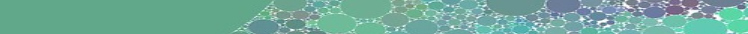
#Projeto: Análise e agrupamento de consumidores com ML
###Autora: Carla Edila Santos da Rosa Silveira
###Contato: rosa.carla@pucpr.edu.br
###Versão original: [Felipe Santana](https://minerandodados.com.br/analise-e-agrupamento-de-clientes-com-machine-learning-k-means/)
###Tecnologias: Google Colab, Kaggle, CCSearch, BeFunky, Github, bibliotecas Python
###Dataset: Mall Customer Segmentation Data (perfil de consumidor alvo)
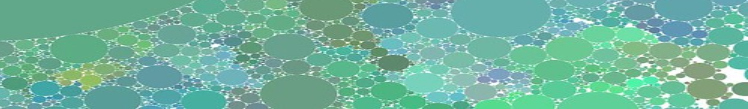
######["cell cluster 3" by Anthony Mattox](https://search.creativecommons.org/photos/822003f4-dc29-44bf-a39d-6cc773e66770) is licensed under CC BY-NC 2.0 


##Importação de bibliotecas do Python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

##Carregamento do dataset

In [5]:
df = pd.read_csv('Mall_Customers.csv')

##Leitura inicial dos dados

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#####-----------Legenda-------------
#####CustomerID = código do cliente
#####Gender = Sexo
#####Age = Idade
#####Annual Income (k$) = Renda anual (k = mil)
#####Spending Score (1-100) = Pontuação de gastos (1 gasto baixo, 100 gasto alto)

##Análise Descritiva

In [18]:
df.shape #definiçao de nro de linhas e colunas 
(200, 5)

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##Estrutura dos dados

In [10]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

##Resumo de variáveis por registros nulos

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##Visualização dos dados

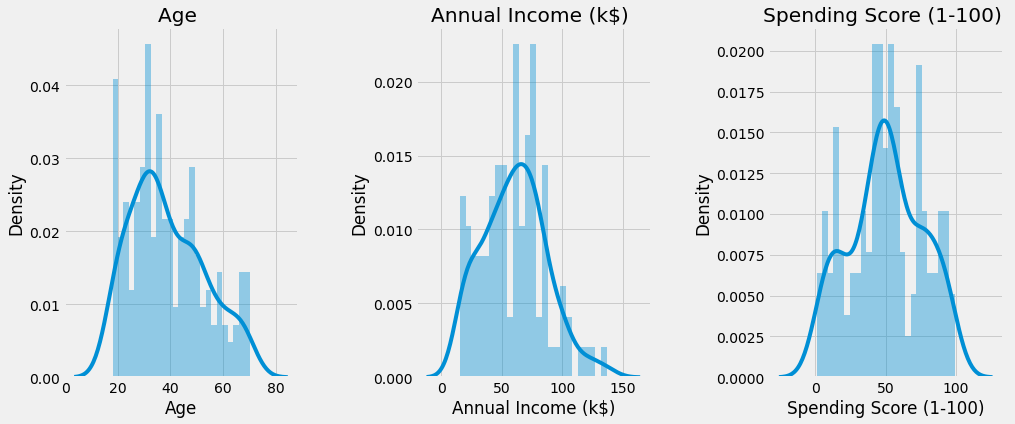

In [12]:
plt.style.use('fivethirtyeight') #define estilo de paragrafos

plt.figure(1 , figsize = (15 , 6)) #verifica a distribuição dos dados
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']: 
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()

##Contagem de amostra por sexo

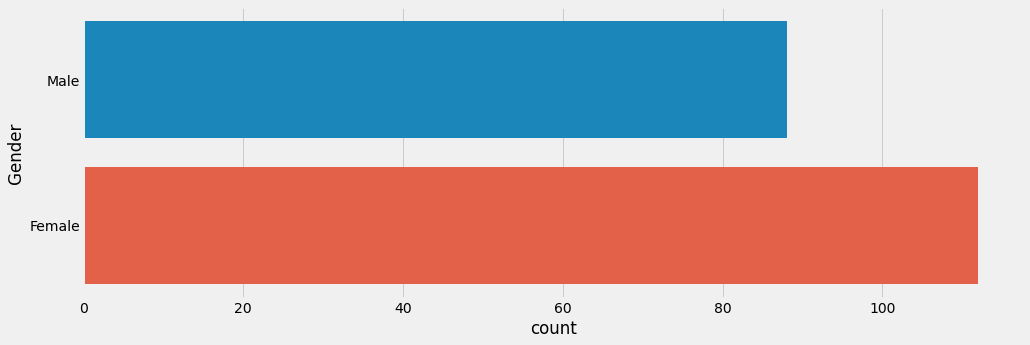

In [13]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

##Relação linear Idade X Renda Anual

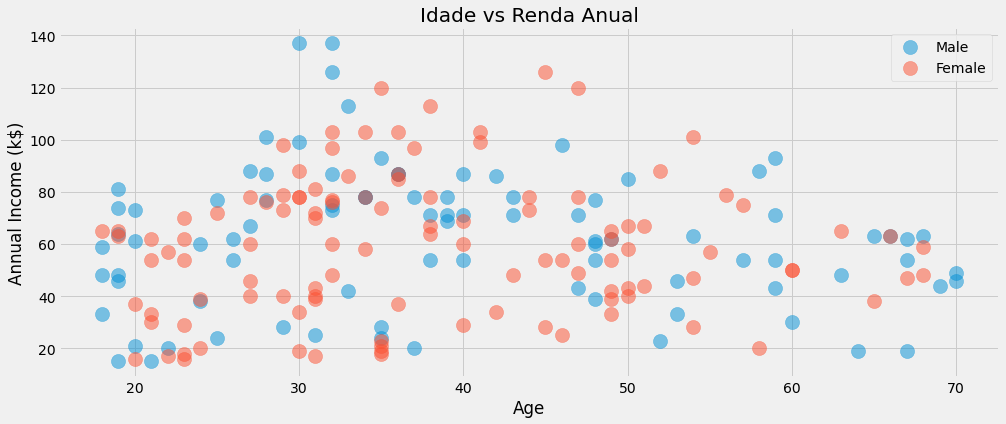

In [14]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Idade vs Renda Anual')
plt.legend() #mostra dados misturados e tendência pouco definida.
plt.show()   #com aumento da idade a renda anual diminui, as maiores rendas estão entre jovens.

##Relação linear Renda Anual X Pontuação de Gastos

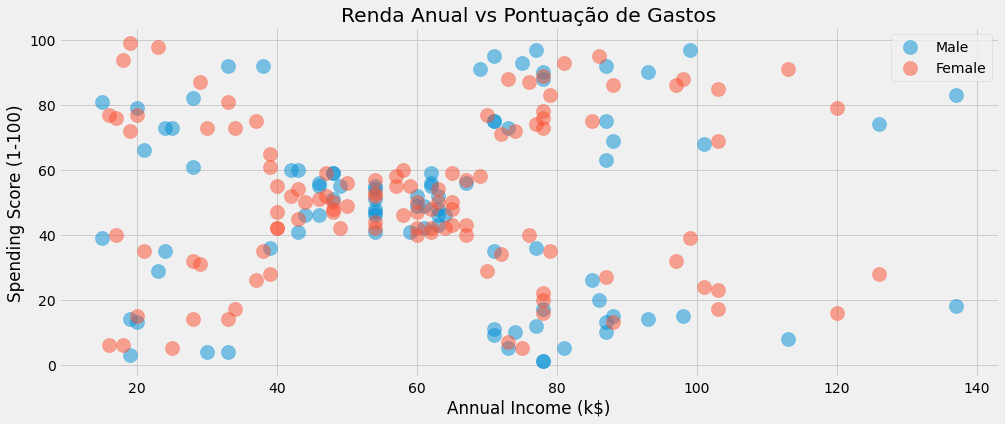

In [15]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Renda Anual vs Pontuação de Gastos')
plt.legend() 
plt.show() #maior concentração na faixa etária 40-65 anos e na pontuação entre 40-60 pontos. 

## Distribuição de Idade, Renda Anual e Pontuação de Gastos segmentados por Sexo

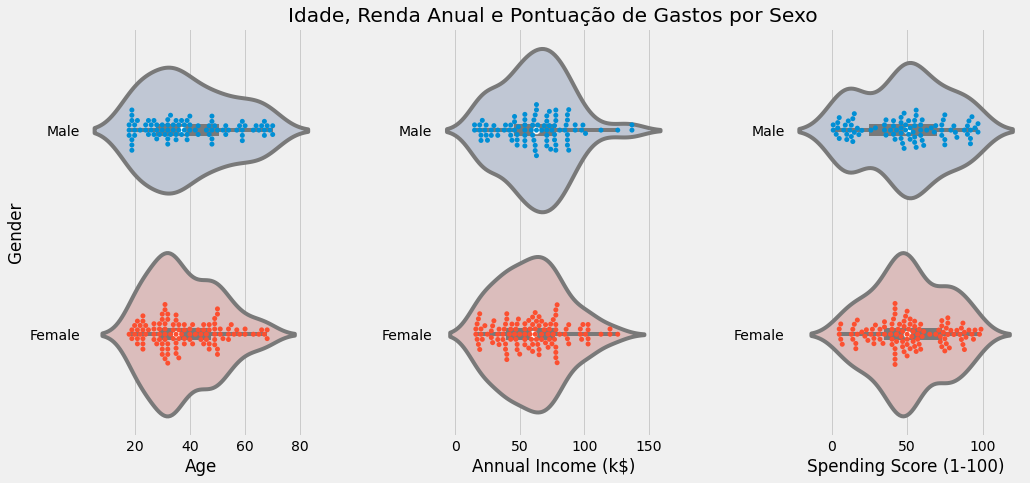

In [16]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Idade, Renda Anual e Pontuação de Gastos por Sexo' if n == 2 else '')
plt.show() #maior diferença está na pontuação, concentrada em torno de 50-80 pontos para mulheres.

##Agrupamento de dados com algoritmo K-Means

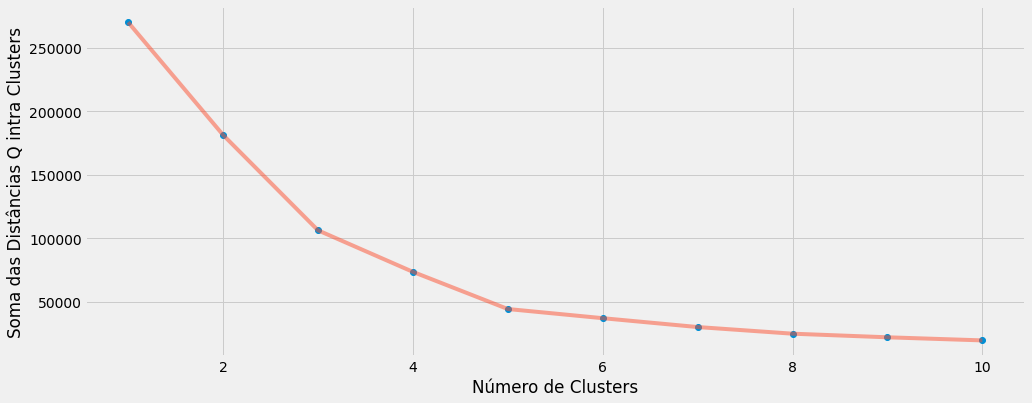

In [19]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values #seleção do nro de clusters com método Elbow (soma das distâncias quadráticas intra clusters)
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6)) #configurações do gráfico
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show() #enquanto o nro clusters aumenta, a soma das distâncias quadráticas intra clusters diminui.
           #quando a diferença entre a distância é quase insignificante chega-se no valor ótimo de k (neste exemplo é 4).

##Inicialização e computação do KMeans com 4 clusters

In [20]:
algorithm = (KMeans(n_clusters = 4)) #dados serão separados em 4 clusters ou grupos
algorithm.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Visualização dos grupos e centróides

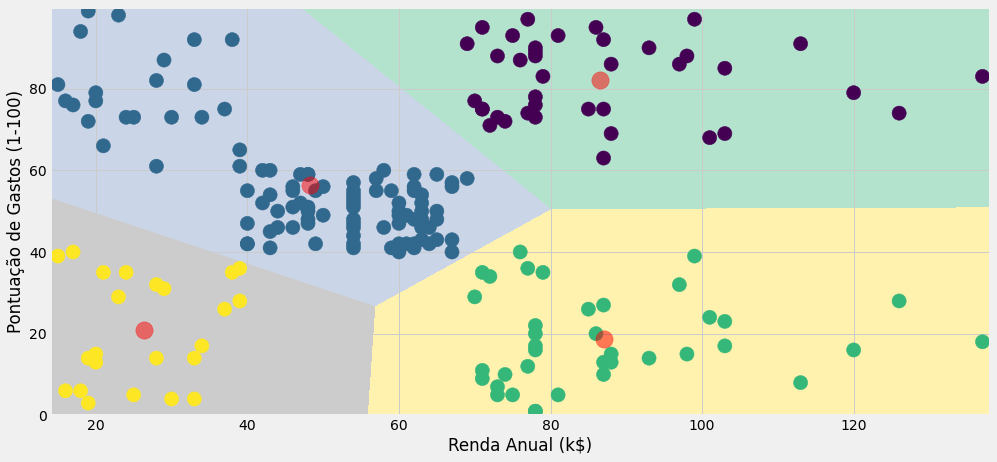

In [21]:
labels2 = algorithm.labels_ 
centroids2 = algorithm.cluster_centers_ #cada grupo terá um centroide (ponto vermelho no gráfico) de onde partirá o cluster

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) ) #configuração do gráfico
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Pontuação de Gastos (1-100)') , plt.xlabel('Renda Anual (k$)')
plt.show()

##Análise dos dados agrupados

In [28]:
df["clusters"] = algorithm.labels_
df.head() #leitura das 5 primeiras linhas

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


##Análise descritiva dos clusters


In [30]:
df_group = df.drop(["CustomerID","Age"],axis=1).groupby("clusters")  #exclusão de colunas não utilizadas
df_group.describe()

Annual Income (k$)                        ... Spending Score (1-100)             
                      count       mean        std  ...                    50%    75%   max
clusters                                           ...                                    
0                      39.0  86.538462  16.312485  ...                   83.0  90.00  97.0
1                     100.0  48.260000  14.562731  ...                   52.5  60.00  99.0
2                      38.0  87.000000  16.271348  ...                   16.5  26.75  40.0
3                      23.0  26.304348   7.893811  ...                   17.0  33.50  40.0

[4 rows x 16 columns]

________________________________________________________________________________
###Autora: Carla Edila Santos da Rosa Silveira
###Contato: rosa.carla@pucpr.edu.br
###Desenvolvido em: 05/08/2021
________________________________________________________________________________
